# Quantum Entanglement
<hr></hr>

[Entanglement](https://en.wikipedia.org/wiki/Quantum_entanglement) is one of the key components that makes quantum computing different from traditional digital systems. As a matter of fact, entanglement might be the main ingredient that allows quantum devices to provide a computational advantage over their classical counterparts. 

To understand entanglement, we will follow a similar approach to that of the previous chapter, and explain how this phenomenon emerges in a physical setup, like for example a system composed by the spin of two separate electrons.

We will then explore how this effect is mapped to the qubit representation in an abstract quantum circuit model, which will be vital step in the construction of quantum algorithms.

## 1. Two-Electron System

### 1.1 Separable Electrons

In the previous chapter we described how the spin of a single electron can be seen as one of many physical implementations of a qubit. Let us now consider a system where we have two isolated electrons for which we want to describe their spin. Like before, we can use a Stern-Gerlach device to measure the spin of each electron. In the diagram below, we show two electrons isolated by a wall in the middle, each being sent to a separate apparatus (labeled SG left and SG right). If both electrons have their spin pointing in the the $\texttt{+}z$ direction, we know that both of the will deflect upwards with $100\%$ probability:

<img src="images/02_02_01_two_spin_up.png" align = "center" width="700"/>

Now, to mathematically represent a system with two electrons (which, we will treat as qubits), we follow the same rules we introduced for [multi-bit reversible-circuit systems](../01_classical_computing/01_03_bits_to_vectors.ipynb#2.1-Multi-Bit-Numbers-as-Vectors). Namely, we use the Kronecker product of the two separate states. So, given two electrons/qubits $q_0$ and $q_1$ (corresponding to the electrons on the right and on the left, respectively), the statevector that represents the entire system is given by:

$$|q\rangle = |q_1\rangle \otimes |q_0\rangle$$

Therefore, if both electrons have their spin pointing in the $\texttt{+}z$ direction (qubits are in state $|0\rangle$), we have the state:

$$
\begin{aligned}
|q\rangle &= |0\rangle \otimes |0\rangle
\\
\\
|q\rangle &= \begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\\
\\
|q\rangle &= \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
\end{aligned}
$$

In a similar way, we can find the column vectors for all possible combinations of spin along the $\pm z$ direction by taking the Kronecker product of the spin-up and spin-down states (denoted as $|0\rangle$ and $|1\rangle$, respectively). Instead of doing this manually, let's use Qiskit to find what these vectors look like:

In [1]:
from qiskit.quantum_info import Statevector

# Define states |0⟩ and |1⟩
state_0 = Statevector.from_label('0') # define state |0⟩
state_1 = Statevector.from_label('1') # define state |1⟩

state_00 = state_0.tensor(state_0)    # compose state |0⟩⊗|0⟩
state_01 = state_0.tensor(state_1)    # compose state |0⟩⊗|1⟩
state_10 = state_1.tensor(state_0)    # compose state |1⟩⊗|0⟩
state_11 = state_1.tensor(state_1)    # compose state |1⟩⊗|1⟩

# display states in column-vector notation
display(state_00.draw('latex', convention='vector', prefix=r'|0\rangle \otimes |0\rangle = '))
display(state_01.draw('latex', convention='vector', prefix=r'|0\rangle \otimes |1\rangle = '))
display(state_10.draw('latex', convention='vector', prefix=r'|1\rangle \otimes |0\rangle = '))
display(state_11.draw('latex', convention='vector', prefix=r'|1\rangle \otimes |1\rangle = '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In the code above, we created `Statevector` objects for $|0\rangle$ and $|1\rangle$, and then found the statevectors for $|0\rangle \otimes |0\rangle$, $|0\rangle \otimes |1\rangle$, $|1\rangle \otimes |0\rangle$, $|1\rangle \otimes |1\rangle$ by making use of the `tensor` method, which applies the Kronecker product between two states.

Let us now consider the case where both electrons have their spin pointing in the $\texttt{+}x$ direction. From the single electron experiments, we know that each electron will deflect upwards or downwards probability of $1/2$:

<img src="images/02_02_02_two_spin_right.png" align = "center" width="700"/>

Since we are considering this to be a joint experiment, let's examine the combination of all possible outcomes. Given that each electron can be deflected up or down, each with $50\%$ probability, we can have a total of 4 possible outcomes each with probability of $25\%$:

<img src="images/02_02_03_two_spin_right_options.png" align = "center" width="740"/>

Mathematically, we can represent our system by, again, taking the Kronecker product of two electrons with spin along the $\texttt{+}x$ direction (which, in the previous chapter we denoted as $|+\rangle$):

$$
\begin{aligned}
|q\rangle &= |+\rangle \otimes |+\rangle
\\
\\
|q\rangle &= \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}
\\
\\
|q\rangle &= \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}
\end{aligned}
$$

Let's also recall that we can express this vector as a linear combination (a **superposition**) of terms as follows:

$$
\begin{aligned}
|q\rangle &= \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}
\\
\\
|q\rangle &= \frac{1}{2}\left( \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} + 
                               \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} + 
                               \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} + 
                               \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} \right)
\\
\\
|q\rangle &= \frac{1}{2}\left(|0\rangle \otimes |0\rangle  + |0\rangle \otimes |1\rangle + |1\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle \right)
\end{aligned}
$$


It is common notation to shorten states of the form $|q_1\rangle \otimes |q_0\rangle $ as $|q_1 q_0\rangle $, so we can rewrite the expression above more succinctly as:

$$ |q\rangle = \frac{1}{2}|00\rangle  + \frac{1}{2}|01\rangle + \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle $$

So, what we have is that, when there are two separate electrons/qubits each in a superposition, the state that represents the total system corresponds to a superposition of four terms premultiplied by the probability amplitude associated with observing each of four possible states. In this particular case, all four states have a probability amplitude of $1/2$, which means we have an equal probability of **measuring** each states equal to:

$$ \mathbb{P}_{00} = \mathbb{P}_{01} = \mathbb{P}_{10} = \mathbb{P}_{11} = \left(\frac{1}{2}\right)^2 = \frac{1}{4}, $$

which is what we expected from the experimental observations.

Same holds true for the other different combinations of $|+\rangle$ and $|-\rangle$, but with different signs in the summation terms. We can actually show what these statevectors look like using Qiskit:

In [2]:
state_p = Statevector.from_label('+') # define state |+⟩
state_m = Statevector.from_label('-') # define state |-⟩

state_pp = state_p.tensor(state_p)    # Compose state |+⟩⊗|+⟩
state_pm = state_p.tensor(state_m)    # Compose state |+⟩⊗|-⟩
state_mp = state_m.tensor(state_p)    # Compose state |-⟩⊗|+⟩
state_mm = state_m.tensor(state_m)    # Compose state |-⟩⊗|-⟩

# display states in bra-ket notation
display(state_pp.draw('latex', prefix='|++\\rangle = '))
display(state_pm.draw('latex', prefix='|+-\\rangle = '))
display(state_mp.draw('latex', prefix='|-+\\rangle = '))
display(state_mm.draw('latex', prefix='|--\\rangle = '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

These systems composed of particles/qubits that do not interact with each other are called <span style="color:#a883f7">**separable**</span> and have the key property that their combined statevectors can always be factorized into the statevectors of their individual qubits. Let's take for example the following 2-qubit separable state and try to factorize it:

$$
\begin{aligned}
|q\rangle &= \frac{1}{2} \left(|0 \rangle \otimes |0\rangle - |0 \rangle \otimes |1\rangle + |1 \rangle \otimes |0\rangle - |1 \rangle \otimes |1\rangle \right)
\\
\\
|q\rangle &= \frac{1}{2} |0 \rangle \otimes (|0\rangle - |1\rangle) + |1\rangle \otimes (|0\rangle - |1\rangle)
\\
\\
|q\rangle &= \frac{1}{2} (|0\rangle + |1\rangle) \otimes (|0\rangle - |1\rangle)
\\
\\
|q\rangle &= \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
\\
\\
|q\rangle &= |+\rangle \otimes |-\rangle
\end{aligned}
$$

The statement above seems obvious. After all, if we have a system composed of two (or more) parts, we should be able to "separate" it into its constituents and get an individual description of each of its components. This is of course true for any classical system; however, in quantum mechanics this is not always the case. But to understand this unusual property we need to talk about entanglement.

### 1.2 Entangled Electrons

Particle spin is a conserved quantity. What this means is that, if we have a particle with spin of $0$, and it decays into two separate particles, the spin of the new particles better add up to $0$. So, if these two particles are like electrons, one of them must have their spin oriented in the exact opposite direction as the other so they cancel each other out. A way to prove this is by something similar to what we had in the previous section: send each particle through a Stern-Gerlach device, and measure the outcomes. Experiments of this kind do indeed show that this is exactly how particles behave: half of the time one particle is deflected up and the other down, and the other half of the time the opposite happens, showing that the particles do indeed have opposite spins.

<img src="images/02_02_04_two_spin_entangled.png" align = "center" width="700"/>

At first glance, this seems rather obvious and unremarkable. However, upon closer inspection, these observations can only be explained if the pair of particles is always generated with a predefined spin along the $z$ direction:

<img src="images/02_02_05_two_spin_z_entangled.png" align = "center" width="700"/>

In other words, this particle decay always results in state $|0\rangle \otimes |1\rangle$ or state $|1\rangle \otimes |0\rangle$ each with equal probability of occurrence.

But why would these particles have a preferential spatial orientation along the $z$ axis? Well, we could hypothesize that this was just rather coincidental for the particular experimental setup we chose, or that there is some strange physical reason in nature to always aligns the particles along some given direction in space. An easy way to verify these hypotheses is to rotate the Stern-Gerlach apparatuses by $90°$; this way the spin of our particles will be now oriented along the $x$ with respect to the devices' magnetic field. The expectation would then be to observe the same as what we have for separable electrons: each individual electron deflects upwards or downwards with $50\%$ probability, but **independent** from each other, so there should be four possible combinations of results each with $25\%$ of occurrence:

<img src="images/02_02_06_two_spin_x_entangled.png" align = "center" width="700"/>

<a name="back1"></a> However, this is **not** what experiments show. No matter what angle we choose to rotate our devices by, the measurements always reflect one of the particles deflecting upwards, and the other one deflecting downwards. It is as if the particles were "linked" together no matter how far away they are from each other, so if one is measured to deflect up (down), the other is instantly measured to deflect down (up). This effect is commonly known as [quantum nonlocality](https://en.wikipedia.org/wiki/Quantum_nonlocality).

Mathematically, this behavior can only be described using a global state for the overall system, but that cannot be separated into a state description of its individual constituents[$^*$](#footnote1). The states that described such type of correlated systems are known as <span style="color:#a883f7">**entangled**</span> states.

Now, to construct a statevector that describes such observations we could follow a similar approach to the one we used with a single electron system. We could say that, since we observe states $|01\rangle$ and $|10\rangle$ each with probability of $1/2$, a reasonable choice for the state that describes this system is:

$$ |q\rangle = \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle, $$

since taking the square of its probability amplitudes gives us the observed probabilities for this system:

$$ \mathbb{P}_{01} = \left(\frac{1}{\sqrt{2}} \right)^2 = \frac{1}{2}, \quad \mathbb{P}_{10} = \left(\frac{1}{\sqrt{2}} \right)^2 = \frac{1}{2}. $$

Although, a state like this:

$$ |q\rangle = \frac{1}{\sqrt{2}}|01\rangle - \frac{1}{\sqrt{2}}|10\rangle, $$

would also result in the same experimental observations:

$$ \mathbb{P}_{01} =  \left(\frac{1}{\sqrt{2}} \right)^2 = \frac{1}{2}, \quad   \mathbb{P}_{10} =  \left(-\frac{1}{\sqrt{2}} \right)^2 = \frac{1}{2}.$$

We will discuss how distinguish between these two type of states later on, but what is critical here is to realize that there is no way in which we can factorize either of these into the Kronecker product of two separate states that describe each of the two particles individually! This is a remarkable and strictly quantum result with no analog in any classical system.

## 2. Two-Qubit Circuits

### 2.1 Separable States

Representing quantum circuits with more than one qubit is as simple as what we did for classical reversible circuits: we just add one extra wire per qubit. Let's implement a two qubit circuit where we place the qubits in the superposition state $|q_1\rangle \otimes |q_0\rangle = |+\rangle \otimes |-\rangle$. 

From above, we know this is a separable state, so we can place $q_1$ in state $|+\rangle$ by applying a Hadamard gate $H$ to that wire. Similarly, we know that to obtain state $|-\rangle$ we have to apply an $H$ gate to state $|1\rangle$. So in $q_0$, we first apply an $X$ gate to take it from its initial state $|0\rangle$ to state $|1\rangle$, and the apply an $H$ gate. Let's do this in Qiskit and extract the output state:

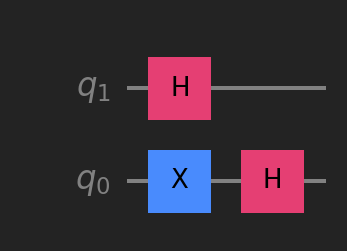

<IPython.core.display.Latex object>

In [3]:
from qiskit import QuantumCircuit

qc_sep = QuantumCircuit(2)    # define quantum circuit
qc_sep.h(1)                   # apply H gate to qubit 1
qc_sep.x(0)                   # apply X gate to qubit 0
qc_sep.h(0)                   # apply H gate to qubit 0

display(qc_sep.draw())        # draw circuit
display(Statevector(qc_sep))  # display statevector

We can complete our circuit to also perform measurements on the output and verify we indeed get each possible combination of states $|0\rangle$ and $|1\rangle$ with equal probability:

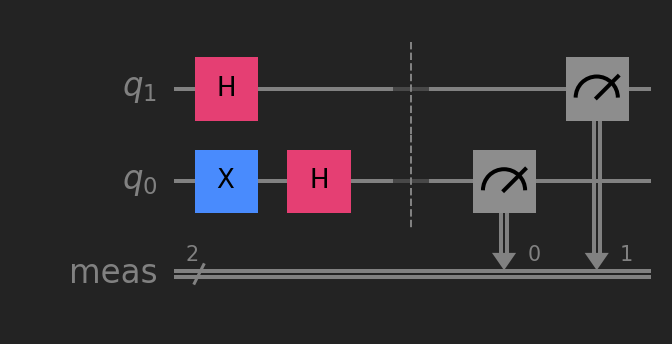

In [4]:
# Add measurement blocks
qc_sep.measure_all()
display(qc_sep.draw())

In [5]:
# perform circuit simulation
from qiskit.providers.basic_provider import BasicSimulator

simulator = BasicSimulator()             # define simulator object
job = simulator.run(qc_sep, shots=1000)  # use run method to execute our circuit some number of shots
result = job.result()                    # extract our results
counts = result.get_counts()             # get the counts from the experiment

print(counts)

{'01': 270, '10': 229, '11': 225, '00': 276}


And as expected, we get each possible outcome about a quarter of the time.

### 2.2 Entangled States

The next obvious question then is: How do we entangle two separate electron spin/qubits? In the section above, entangled particles with opposite spins were generated from the decay of $0$-spin particle, but what if we have two non-entangled electrons to begin with? Well, in practice there are indeed ways to entangle electrons by having them interact with each other in a way that, due to the [Pauli exclusion principle](https://en.wikipedia.org/wiki/Pauli_exclusion_principle), their spins must be opposite to each other. The details of how this is done are outside of the scope of this chapter, but you can learn more about it by looking into how [spin-qubit quantum computers](https://en.wikipedia.org/wiki/Spin_qubit_quantum_computer) are built (e.g., [[Burkard23](https://link.aps.org/accepted/10.1103/RevModPhys.95.025003)]). The bottom line is that, in principle we can take two electrons, have them interact by the use of electromagnetic fields and, depending on the state of the incoming electrons, get them entangled. From a circuit standpoint, this is exactly what the $CX$ gate we introduced in the chapter on reversible computing does. 

The diagram below shows an example of the different steps involved in generating a pair of entangled electrons with the corresponding quantum circuit diagram. 

<img src="images/02_02_07_spin_vs_qubit_entangled.png" align = "center" width="750"/>

Furthermore, we can work through the math of the gates applied to these statevectors and verify that this procedure actually works:

1. The qubits are initialized in the all-zeros (ground) state:

$$ 
|q\rangle = |q_1 q_0\rangle = |0\rangle \otimes |0\rangle \quad \quad \text{}
$$

2. Apply Hadamard gate to $q_1$:

$$ 
\begin{aligned}
|q\rangle &= H |0\rangle \otimes |0\rangle 
\\
\\
|q\rangle &= |+\rangle \otimes |0\rangle 
\\
\\
|q\rangle &= \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle \right)  \otimes |0\rangle 
\\
\\
|q\rangle &= \frac{1}{\sqrt{2}} \left(|0\rangle \otimes |0\rangle  + |1\rangle \otimes |0\rangle  \right)
\end{aligned}
$$

3. Apply $CX$ with control in $q_1$ and target in $q_0$ (recall when control is $1$, target gets flipped):

$$ 
\begin{aligned}
|q\rangle &= CX \left[ \frac{1}{\sqrt{2}} \left(|0\rangle \otimes |0\rangle  + |1\rangle \otimes |0\rangle \right) \right ]
\\
\\
|q\rangle &= \frac{1}{\sqrt{2}} \left(|0\rangle \otimes |0\rangle  + |1\rangle \otimes |1\rangle \right)
\end{aligned}
$$

Notice how we opted to do these operations using ket notation since we already know how each of the $H$ and $CX$ gates operate on statevectors, but we could've equally done this using matrices and column vectors. We will write down these steps next but using the `Statevector` and `Operator` classes in Qiskit to show our work:

1. Initialize qubits to $|00\rangle$ vector:

In [4]:
q = Statevector.from_label('00')
q.draw('latex', convention='vector', prefix=r'|q\rangle = ')

<IPython.core.display.Latex object>

2.1 Define Hadamard matrix $H$ and Identity matrix $I$. Since our column vector is composed of two qubits ($q_0$ and $q_1$), and we want to apply $H$ only to $q_1$, we need to create a new matrix $H \otimes I$, so that $q_0$ is left unchanged:

In [5]:
from qiskit.quantum_info import Operator

# Define H
H = Operator.from_label('H')
display(H.draw('latex', prefix = 'H = '))

# Define I
I = Operator.from_label('I')
display(I.draw('latex', prefix = 'I = '))

# Compose H⊗I
HI = H.tensor(I)
display(HI.draw('latex', prefix = r'H \otimes I = '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

2.2 Apply composed matrix $H \otimes I$ to $|00\rangle$:

In [6]:
q = q.evolve(HI)
q.draw('latex', convention='vector', prefix=r'|q\rangle = ')

<IPython.core.display.Latex object>

3.1 Define $CX$ matrix. There is not a label to do this in Qiskit, so we are going to explicitly pass matrix we defined for the $CX$ gate in a [previous chapter](https://learnquantum.io/chapters/01_classical_computing/01_03_bits_to_vectors.html#multi-bit-systems):

In [7]:
CX = Operator([[1,0,0,0],
               [0,1,0,0],
               [0,0,0,1],
               [0,0,1,0]])
display(CX.draw('latex', prefix = 'CX = '))

<IPython.core.display.Latex object>

3.2 Apply $CX$ matrix to state $|q\rangle$ to get our output. We will display this in both column-vector and ket notation:

In [8]:
q = q.evolve(CX)
display(q.draw('latex', convention='vector', prefix=r'|q\rangle = '))
display(q.draw('latex', prefix=r'|q\rangle = '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Similarly, we can accomplish the exact same output by implementing in Qiskit the quantum circuit we defined above to create an entangled state:

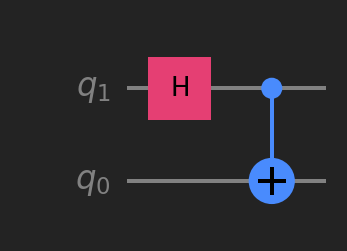

<IPython.core.display.Latex object>

In [7]:
qc_ent = QuantumCircuit(2)    # define quantum circuit
qc_ent.h(1)                   # apply H gate to qubit 1
qc_ent.cx(1,0)                # apply CX with control on q1 and target on q0

display(qc_ent.draw())        # draw circuit
display(Statevector(qc_ent))  # display statevector

And just like we did for the example with a separable state, we can add measurements to our circuit and perform a simulation to show that the only two possible outcomes are either `00` or `11`, each with equal probability:

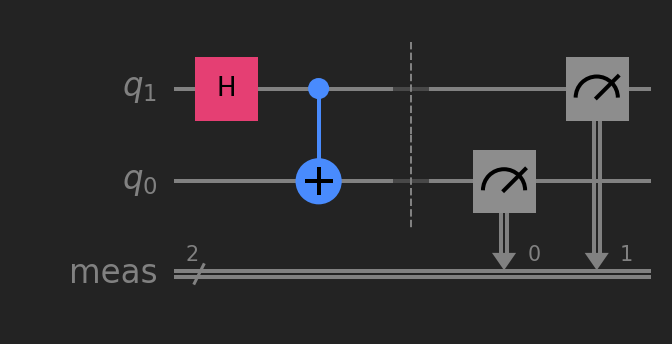

In [10]:
# Add measurement blocks
qc_ent.measure_all()
display(qc_ent.draw())

In [11]:
# perform circuit simulation
job = simulator.run(qc_ent, shots=1000)  # use run method to execute our circuit some number of shots
result = job.result()                    # extract our results
counts = result.get_counts()             # get the counts from the experiment

print(counts)

{'11': 508, '00': 492}


Now that we have a reasonable understanding of how the concepts of superposition and entanglement work for equiprobable one- and two-qubit systems, we will next generalize these concepts for systems where our probability amplitudes are not always equal in amplitude, and where we can have more than two qubits.

## Footnotes

<a name="footnote1"></a><span style="font-size: smaller;">$^*$Technically, this view of having an inseparable wavefunction that describes non-local effects is only true in the [Schrödinger picture](https://en.wikipedia.org/wiki/Schr%C3%B6dinger_picture) of quantum mechanics. However, when using the the [Heisenberg picture](https://en.wikipedia.org/wiki/Heisenberg_picture), one can construct a fully local representation of quantum systems [[Deutsch99](https://arxiv.org/pdf/quant-ph/9906007)]. ([go back](#back1))